## Gaussian Processes in standard python

Basic examples. Check:

https://mlatcl.github.io/mlphysical/

http://krasserm.github.io/2018/03/19/gaussian-processes/


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: 
            -Array of m points (m x d).
        X2:
            -Array of m points (n x d).
        l: 
            -Kernel length parameter.
        sigma_f: 
            -Kernel vertical variation parameter.
    Returns:
        (m x n) kernel matrix.
    """
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def posterior(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, noise=1e-8):
    """
    Computes the suffifient statistics of the posterior distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: 
            -New input locations (n x d).
        X_train: 
            -Training locations (m x d).
        Y_train: 
            -Training targets (1 x d).
        l: 
            -Kernel length parameter.
        sigma_f: 
            -Kernel vertical variation parameter.
        noise:  
            -Noise parameter.

    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    """
    K = kernel(X_train, X_train, l, sigma_f) + noise**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = np.linalg.inv(K)
    
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

def box_muller_1d(dummy):    
    """
    Box muller method for random sampling.
    
    Args:
        dummy: 
            -size i.e. number of samples.
    Returns:
        samples
    """
    U1 = np.random.uniform(size = dummy)
    U2 = np.random.uniform(size = dummy)
    R = np.sqrt(-2 * np.log(U1))
    Theta = 2 * np.pi * U2
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)
    return X

def sample_gauss_box_mueller_1d(mu,sigma,size):
    """
    applies box muller to get gaussian distributions.
    
    Args:
        mu:
            -mean.
        sigma:
            -variance.
        size: 
            -size i.e. number of samples.
    Returns:
        samples
    """
    return box_muller_1d(size) * sigma + mu

def sample_multivariante_normal_1d(mu,K,epsilon=1e-20):
    """
    samples multivariante normal distributions.
    
    Args:
        mu:
            -mean.
        K:
            -kernel i.e. covariance matrix.
        epsilon: 
            -noise needed to solve cholesky.
    Returns:
        samples
    """
    d = len(mu)
    Kx = K + epsilon*np.eye(d)
    L = np.linalg.cholesky(Kx)
    u = sample_gauss_box_mueller_1d(0, 1, d )
    return mu.transpose() + np.dot(L, u)

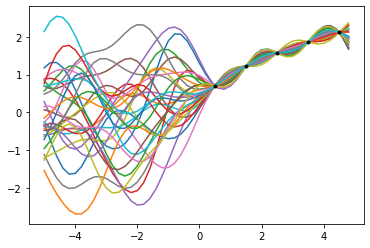

In [5]:
# Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)


# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

X_train = np.arange(0.5,5).reshape(-1, 1)
Y_train = np.sqrt(X_train)

# Compute mean and covariance of the posterior distribution
mu_s, cov_s = posterior(X, X_train, Y_train, l=1.0, sigma_f=1., noise=1e-8)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 30)

plt.plot( np.squeeze(X), samples.T )
plt.plot(np.squeeze(X_train),np.squeeze(Y_train),".k")
plt.show()

**gaussian distribution tests**

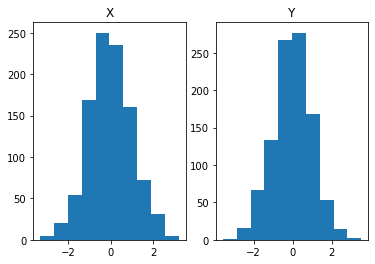

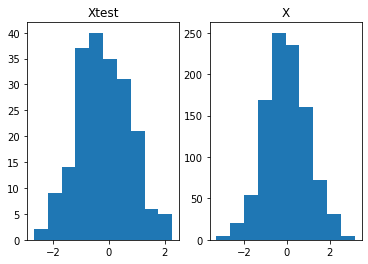

In [6]:
np.random.seed(521)
U1 = np.random.uniform(size = 1000)
U2 = np.random.uniform(size = 1000)
R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

fig,(ax1,ax2) = plt.subplots(1,2)
temp = ax1.hist(X)
ax1.set_title("X")
temp = ax2.hist(Y)
ax2.set_title("Y")
plt.show()

test =  box_muller_1d(200)




fig,(ax1,ax2) = plt.subplots(1,2)
temp = ax1.hist(test)
ax1.set_title("Xtest")
temp = ax2.hist(X)
ax2.set_title("X")
plt.show()